In [1]:
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
folder_name = "results"
filelame = "missing_evaluation.csv"
file_path = os.path.join(folder_name, filelame)
supervised_metrics = ["ACC", "MCC", "F1", "precision", "recall", "ami", "ari", "completeness"]
unsupervised_metrics = ["silhouette", "vrc", "db", "dunn"]
metrics = supervised_metrics + unsupervised_metrics

In [3]:
results = pd.read_csv(file_path)
print("results", results.shape)
results.head()

results (1398, 43)


,alg,dataset,n_samples,missing_percentage,time,execution,ACC,MCC,F1,precision,...,sub_completeness,sub_silhouette,sub_vrc,sub_db,sub_dunn,sub_random_acc,sub_random_f1,sub_label_sizes,sub_relative_label_sizes,comments
0,Concat,nutrimouse_genotype,40,0,0.214966,0,0.575,0.154919,0.514286,0.600,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Concat,nutrimouse_genotype,40,0,0.018543,1,0.600,0.204124,0.555556,0.625,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Concat,nutrimouse_genotype,40,0,0.019474,2,0.575,0.154919,0.514286,0.600,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Concat,nutrimouse_genotype,40,0,0.018038,3,0.575,0.154919,0.514286,0.600,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Concat,nutrimouse_genotype,40,0,0.033552,4,0.600,0.204124,0.555556,0.625,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
monet_results = results[results["alg"] == "MONET"]
monet_results.loc[:, metrics] = monet_results.loc[:, [f"sub_{i}" for i in metrics]].values
monet_results.loc[:, "alg"] = "MONET_wm"
results = pd.concat([results, monet_results])

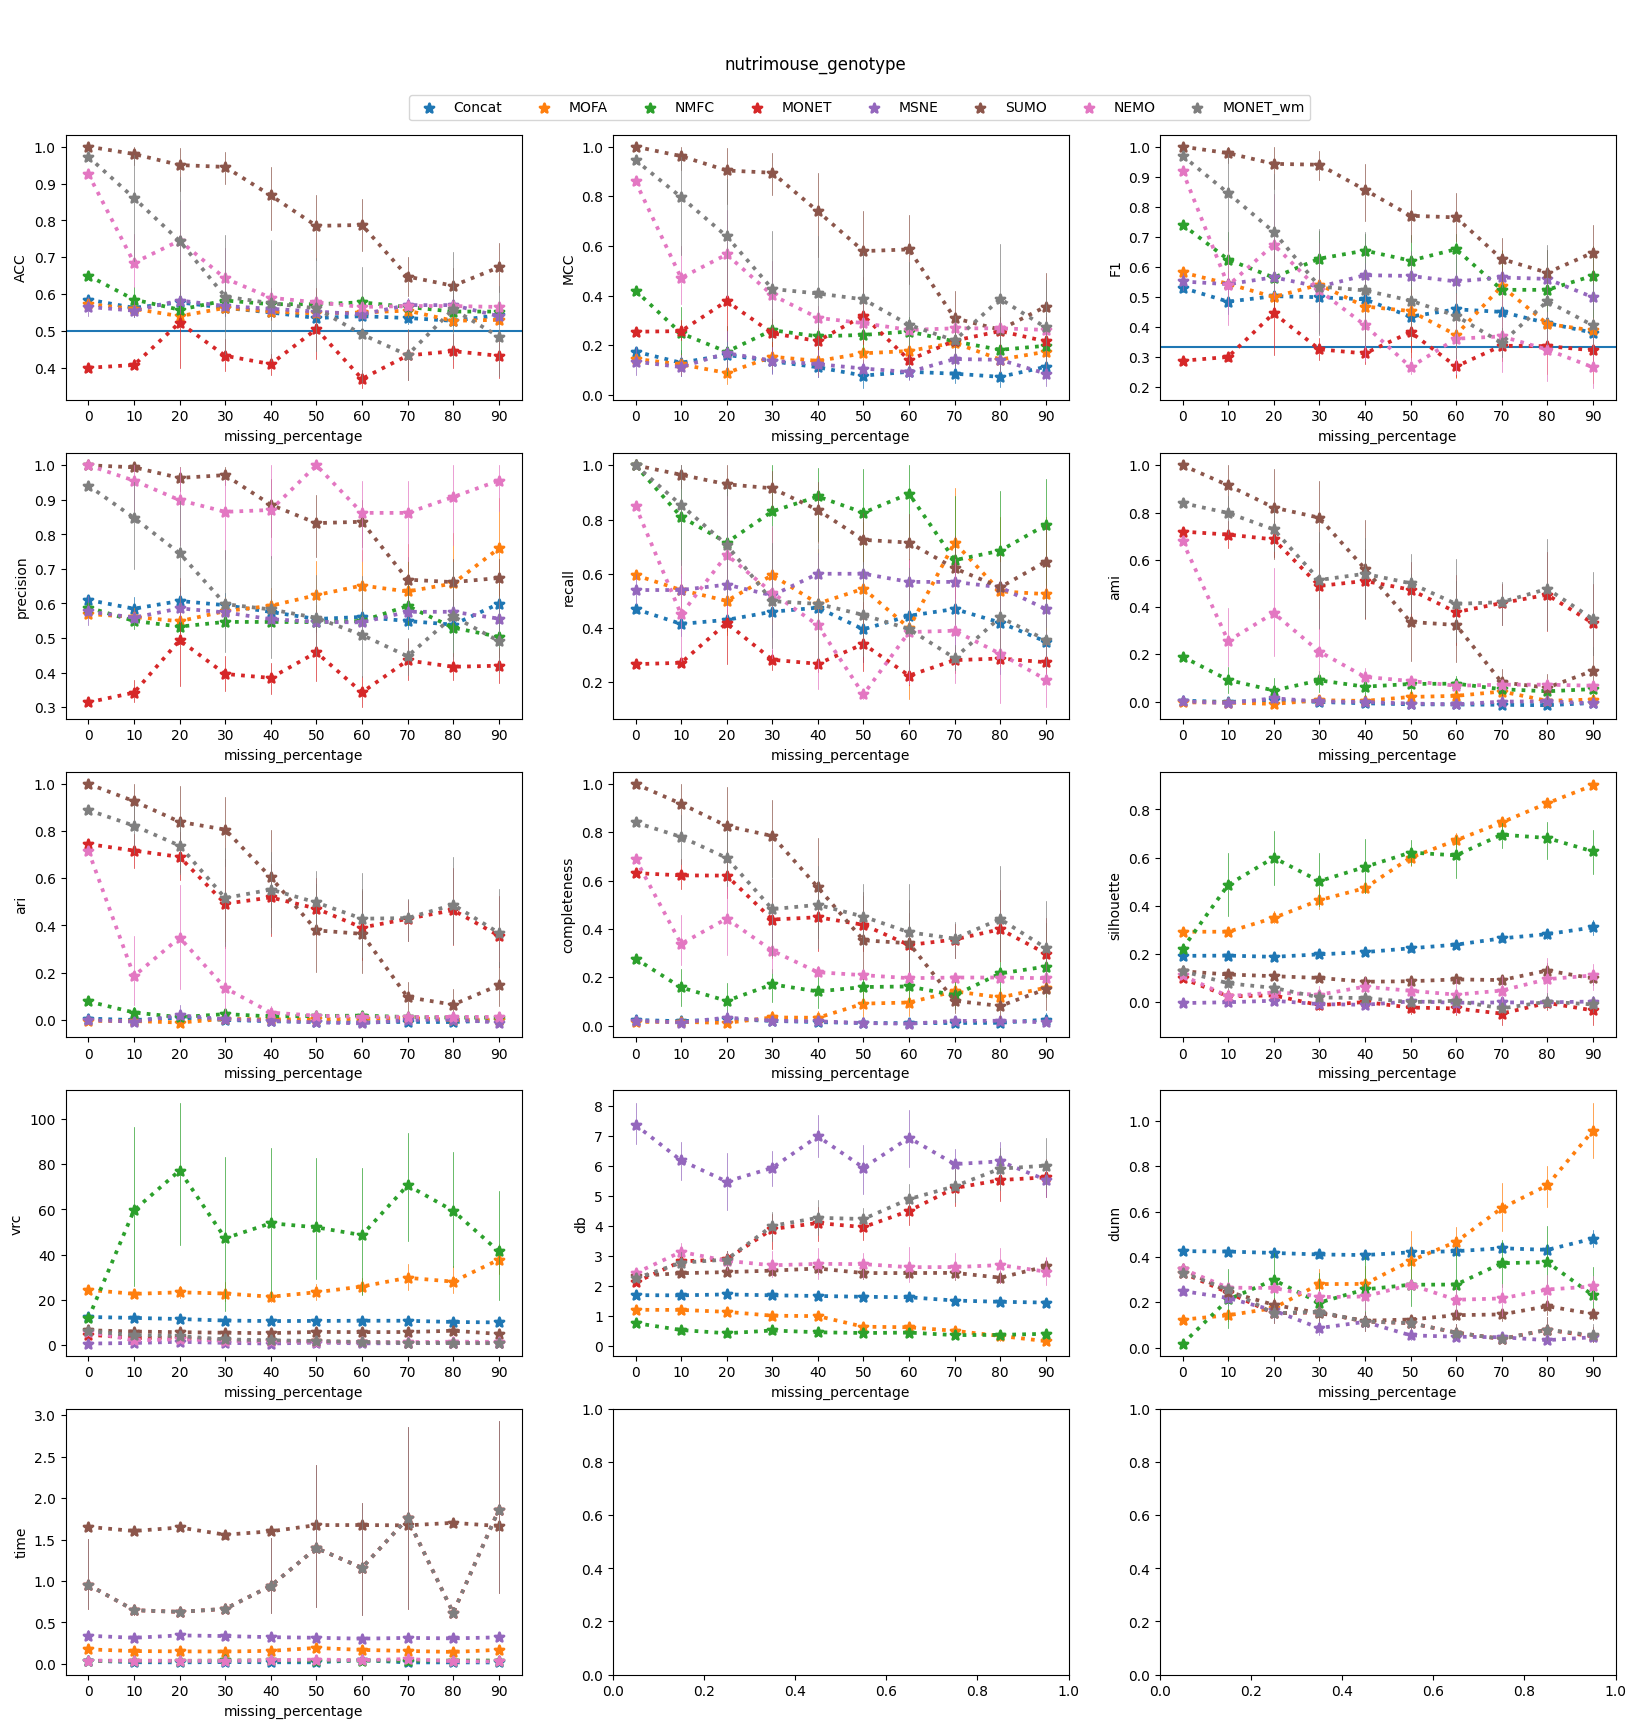

In [5]:
dataset_name = "nutrimouse_genotype"
dataset_results = results[results["dataset"] == dataset_name]
nrows = 5
ncols = 3
fig, axes = plt.subplots(nrows,ncols, figsize = (20, 20))
fig.suptitle(dataset_name, y= 0.92)
for metric, ax in zip(metrics + ["time"], axes.flatten()):
    sns.pointplot(data= dataset_results, x= "% incomplete samples", y= metric, hue= "alg", seed= 42, errwidth= 0.5, ax = ax, linestyles= "dotted", markers= "*")
    if metric == "ACC":
        ax.axhline(dataset_results["random_acc"].iloc[0])
    elif metric == "F1":
        ax.axhline(dataset_results["random_f1"].iloc[0])
fig.legend(*ax.get_legend_handles_labels(), ncol=dataset_results["alg"].nunique(), loc= [0.25,0.93])
[[c.get_legend().remove() for c in ax if c.get_legend() is not None] for ax in axes]
plt.show()

/home/alberto/anaconda3/envs/imc/lib/python3.10/site-packages/numpy/lib/function_base.py:4527: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)


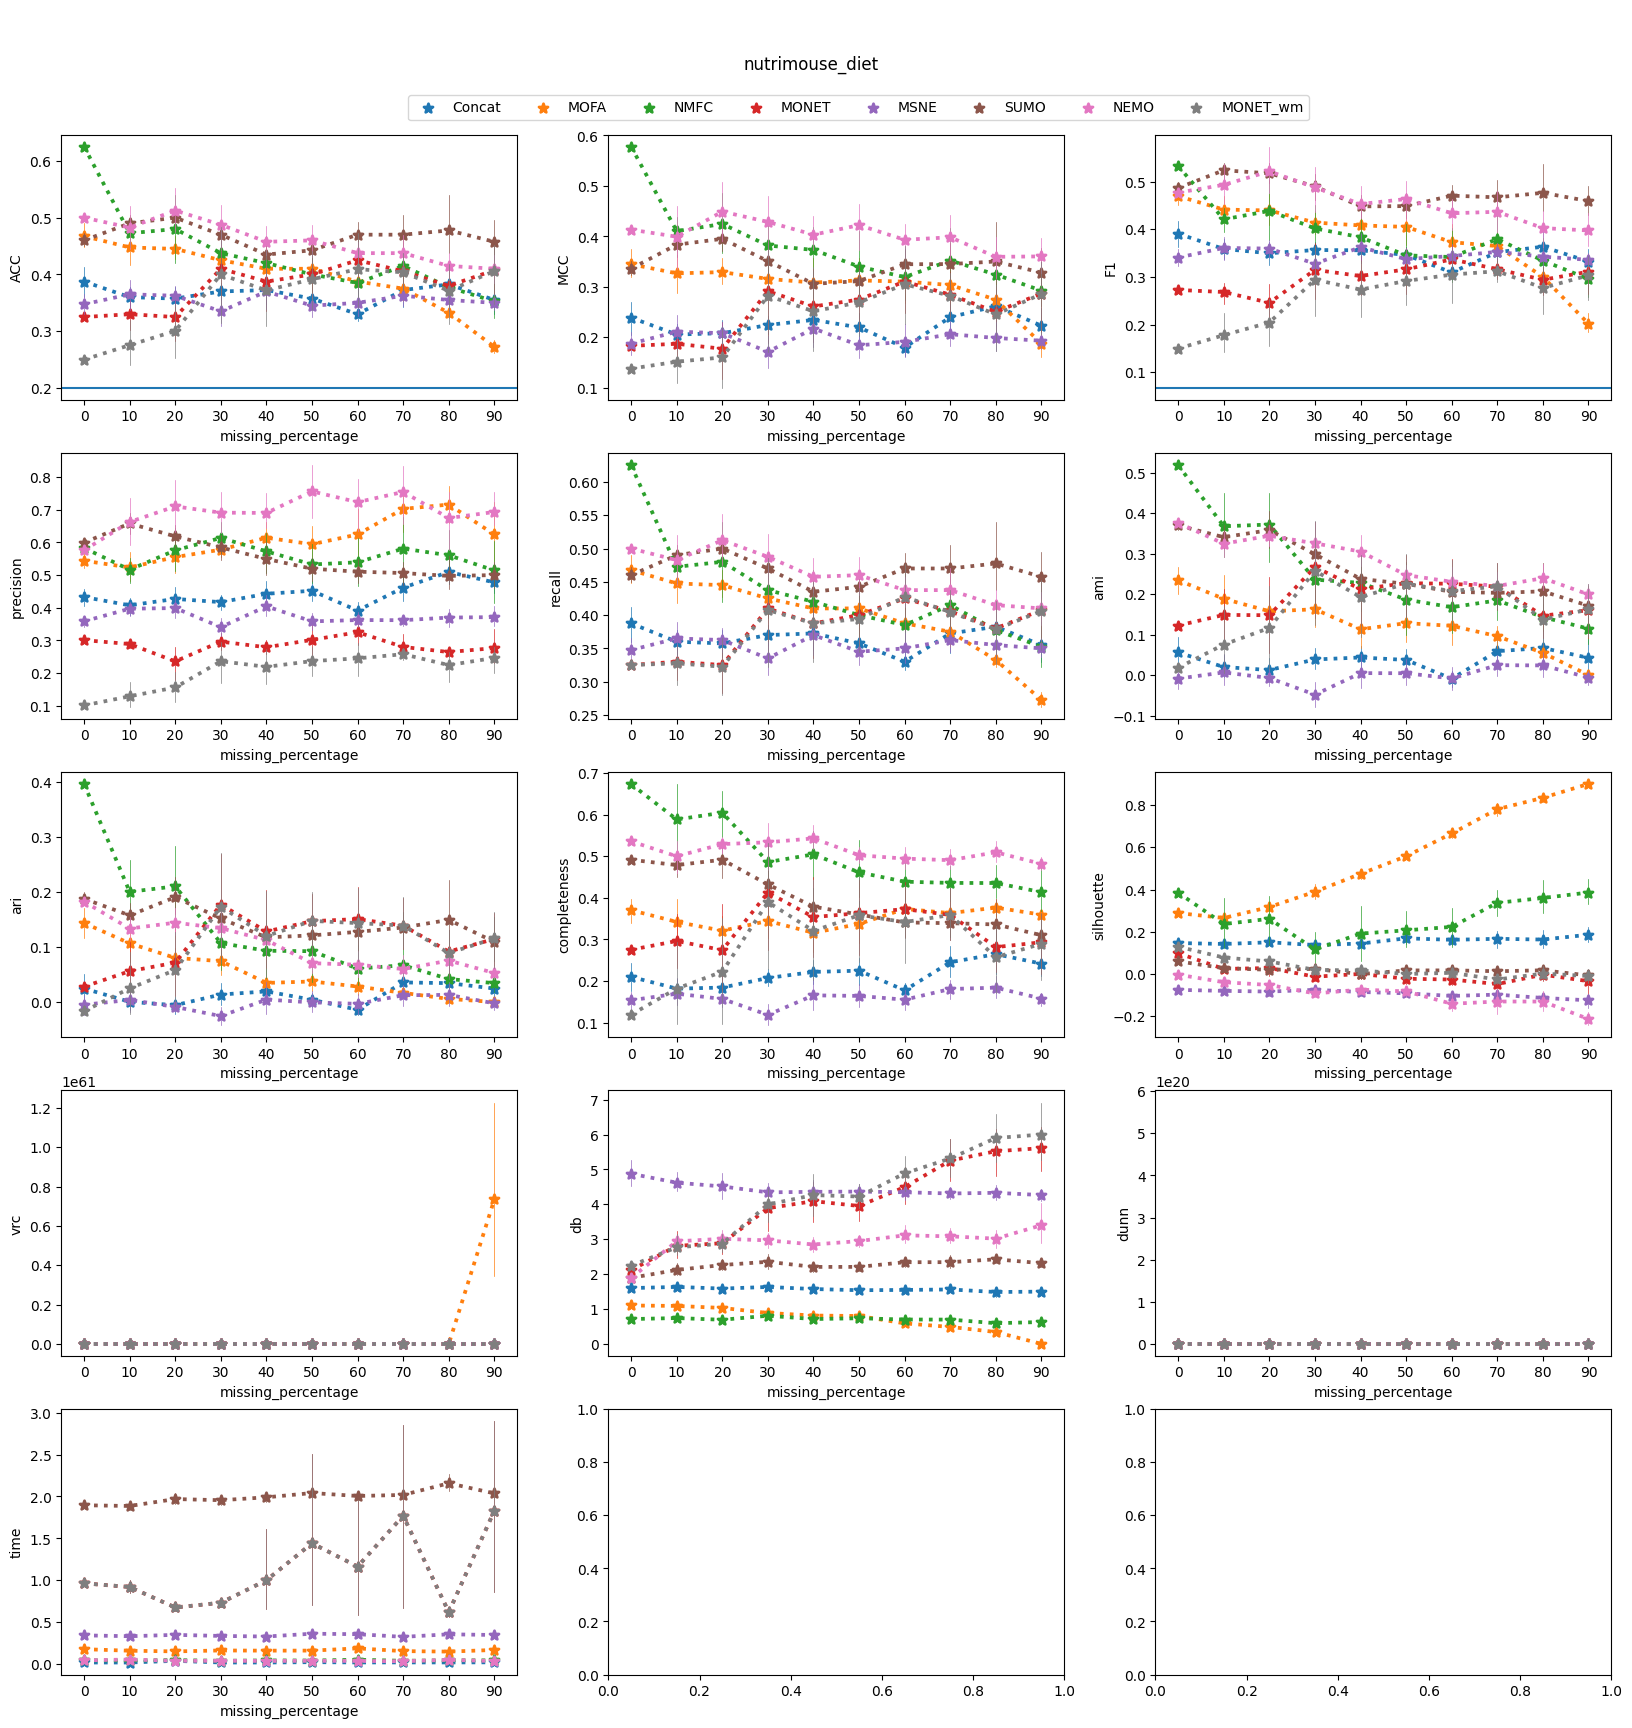

In [6]:
dataset_name = "nutrimouse_diet"
dataset_results = results[results["dataset"] == dataset_name]
nrows = 5
ncols = 3
fig, axes = plt.subplots(nrows,ncols, figsize = (20, 20))
fig.suptitle(dataset_name, y= 0.92)
for metric, ax in zip(metrics + ["time"], axes.flatten()):
    sns.pointplot(data= dataset_results, x= "% incomplete samples", y= metric, hue= "alg", seed= 42, errwidth= 0.5, ax = ax, linestyles= "dotted", markers= "*")
    if metric == "ACC":
        ax.axhline(dataset_results["random_acc"].iloc[0])
    elif metric == "F1":
        ax.axhline(dataset_results["random_f1"].iloc[0])
fig.legend(*ax.get_legend_handles_labels(), ncol=dataset_results["alg"].nunique(), loc= [0.25,0.93])
[[c.get_legend().remove() for c in ax if c.get_legend() is not None] for ax in axes]
plt.show()